In [1]:
import pandas as pd
import numpy as np


In [6]:
# Fijamos la semilla para reproducibilidad
np.random.seed(42)
# Generamos 1000 registros de alumnos
num_alumnos = 1000
data = {
    "calificacion_promedio": np.round(np.random.uniform(3, 10, num_alumnos), 2),
    "asistencia": np.round(np.random.uniform(50, 100, num_alumnos), 2),
    "horas_estudio": np.random.randint(0, 6, num_alumnos),
    "nivel_socioeconomico": np.random.choice([1, 2, 3], num_alumnos),
    "actividades_extracurriculares": np.random.choice([0, 1], num_alumnos),
    "problemas_conducta": np.random.choice([0, 1], num_alumnos)
}
df = pd.DataFrame(data)

# Reglas para determinar abandono escolar (de forma simulada)
df["abandono"] = ((df["calificacion_promedio"] < 5) & (df["asistencia"] < 70)) | (df["problemas_conducta"] == 1)
df["abandono"] = df["abandono"].astype(int)  # Convertimos a valores 0 y 1

print(df.head())



   calificacion_promedio  asistencia  horas_estudio  nivel_socioeconomico  \
0                   5.62       59.26              3                     2   
1                   9.66       77.10              2                     1   
2                   8.12       93.65              3                     1   
3                   7.19       86.61              5                     3   
4                   4.09       90.33              1                     1   

   actividades_extracurriculares  problemas_conducta  abandono  
0                              0                   1         1  
1                              1                   0         0  
2                              0                   0         0  
3                              1                   1         1  
4                              0                   1         1  


- Calificación promedio (0 a 10)
  - Asistencia a clase (porcentaje)
  - Horas de estudio diarias (0 a 5 horas)
  - Nivel socioeconómico (1 = bajo, 2 = medio, 3 = alto)
  - Participación en actividades extracurriculares (1 = sí, 0 = no)
  - Problemas de conducta (1 = sí, 0 = no)
  - Si abandonó o no la escuela (1 = sí, 0 = no)

calificacion_promedio            0
asistencia                       0
horas_estudio                    0
nivel_socioeconomico             0
actividades_extracurriculares    0
problemas_conducta               0
abandono                         0
dtype: int64


Text(0.5, 1.0, 'Distribución de Estudiantes que Abandonan o No')

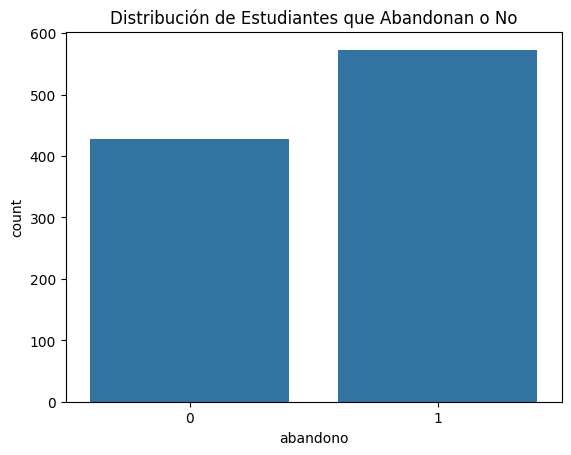

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

# Verificar valores nulos
print(df.isnull().sum())

# Ver distribución de la variable objetivo
sns.countplot(x='abandono', data=df)
plt.title('Distribución de Estudiantes que Abandonan o No')



In [9]:
from sklearn.preprocessing import StandardScaler

# Variables predictoras y objetivo
X = df.drop(columns=['abandono'])
y = df['abandono']

# Normalizar los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)


In [11]:
from sklearn.ensemble import RandomForestClassifier

modelo = RandomForestClassifier(n_estimators=100, random_state=42)
modelo.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

Precisión del modelo: 99.33%
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       114
           1       1.00      0.99      0.99       186

    accuracy                           0.99       300
   macro avg       0.99      0.99      0.99       300
weighted avg       0.99      0.99      0.99       300



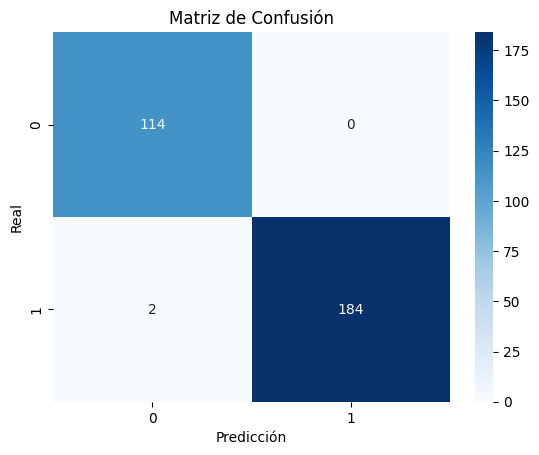

In [12]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
y_pred = modelo.predict(X_test)

print(f'Precisión del modelo: {accuracy_score(y_test, y_pred) * 100:.2f}%')
print(classification_report(y_test, y_pred))

# Matriz de confusión
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.title('Matriz de Confusión')
plt.show()